In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Simple Mean method

In [2]:
!ls

Kaggle Competition Code.ipynb submission_cont.csv
README.md                     submission_cont_normalize.csv
datasets                      submission_good.csv
submission_bad.csv            suggestions.md


In [3]:
missing_values = ["n/a", "na", "--"]
train = pd.read_csv('./datasets/train.csv', na_values = missing_values)
test = pd.read_csv('./datasets/test.csv', na_values = missing_values) 

In [ ]:
train.shape, test.shape

In [ ]:
train.info()

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [4]:
y = train['SalePrice']

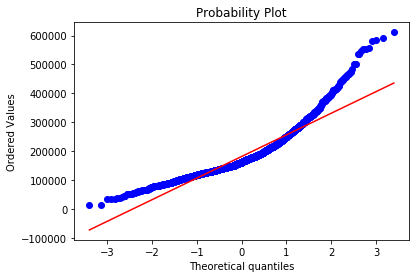

In [8]:
stats.probplot(y,plot=plt);

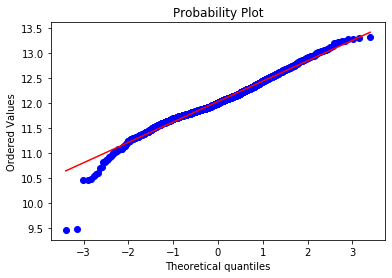

In [9]:
y_log = np.log(train['SalePrice'])
stats.probplot(y_log,plot=plt);

In [ ]:
#Will's stuff

train['SalePrice'][:3]

y_bar = np.mean(train['SalePrice'])

y_bar

output = pd.DataFrame( {'Id':test['Id']})

output.head()

output.shape

output['SalePrice'] = y_bar

output.head()

output.shape

output.to_csv('submission_good.csv', index = False)

!ls


## Linear Regression

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Model that only uses continuous variables and imputes the mean of the column for the NA values

In [11]:
train1_cont = train.select_dtypes(include=['float64','int64']).copy()
train1_cont.fillna(train1_cont.mean(), inplace =True) #fills the empty cells with the mean of that column
display(train1_cont.head())
train1_cont.isnull().sum()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,69.0552,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0000,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0000,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0000,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0000,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


Id                 0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

In [12]:
#split into test and train, note we can't even do this until after we clean the train dataset
X = train1_cont.drop(columns = 'SalePrice')
y = train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) #called it 'val' for validation 
print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)

(1640, 38) (1640,)
(411, 38) (411,)


In [ ]:
X_train.dtypes

In [13]:
#try linear model without any modifications-- has an issue bc there are missing values I think
l1 = LinearRegression()
l1.fit(X_train,y_train)
p1 = l1.predict(X_val)

l1.score(X_val, y_val) #RSS

0.7838259336054856

In [20]:
#if I'm understanding this correctly, you just do the same thing to the test data as you did to the train...
t1 = test.select_dtypes(include=['float64','int64']).copy()
t1.fillna(t1.mean(), inplace =True)
t1.head()
sub2 = l1.predict(t1)
sub2

array([124207.05466045, 159266.62392863, 216594.56783517, 116826.51258584,
       198848.3333413 ,  66929.12899424, 104572.49298073, 134152.76684694,
       163576.71909461, 178090.14157994, 156224.10101322, 139064.93180743,
       153525.32686894, 260192.69172023, 180415.16585885, 143823.52170544,
       137117.34898262, 117392.55758242, 229670.1559041 , 192510.33354873,
       146868.25254537, 130248.33337566, 192634.23205429, 171622.41773241,
       192474.17846856, 109342.20792863, 110420.33584609, 133508.11112975,
       153654.88675129,  26737.91332993,  94201.2059268 ,  79247.05227819,
       241051.29793041, 156758.10311984, 225436.4152128 , 189626.78427578,
       119092.89182651,  84483.4128272 , 113192.67940809, 193506.54370312,
       141871.09780079, 221711.10021521, 162821.18300461, 182297.0444777 ,
       223659.85953676,  80197.40660327, 221221.83620929, 130622.9237717 ,
       127783.97257924, 122789.10260545, 115399.47834288, 220224.6223506 ,
       256145.85119933, 1

In [15]:
output2 = pd.DataFrame( {'Id':test['Id']})
output2['SalePrice'] = sub2
output2.to_csv('submission_cont.csv', index = False)

### Using log transform- got me the highest kaggle score

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y_log, test_size=0.2)
l5 = LinearRegression()
l5.fit(X_train,y_train)
p5 = l5.predict(X_val)

l5.score(X_val, y_val)

0.8784333831307676

In [18]:
t5 = test.select_dtypes(include=['float64','int64']).copy()
t5.fillna(t5.mean(), inplace =True)
sub4 = l5.predict(t5)

In [24]:
sub4 = np.exp(list(sub4))
output4 = pd.DataFrame( {'Id':test['Id']})
output4['SalePrice'] = sub4
output4.to_csv('submission_cont_pricelog.csv', index = False)

### Model as above but using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
# Perform cross validation
scores = cross_val_score(l1, X_train, y_train, cv=10)
print ('Cross_validated scores:', scores)

### Sifting throught the columns and picking the ones I think are relevant

In [ ]:
train.columns

In [ ]:
train['Garage Cars'].unique()

In [25]:
features = ['Lot Area', 'Utilities', 'Neighborhood', 'House Style', 'Overall Qual','Year Built', 'Heating',
           'Central Air', 'Full Bath', 'Kitchen Qual', 'Garage Type', 'Garage Cars', 'Pool Area', 'Mo Sold','SalePrice']
train2 = train[features]

In [ ]:
train2.dtypes

In [ ]:
train2.isnull().sum()

In [26]:
#dropped the rows with missing values from garage type and garage cars

train2 = train2.dropna(axis=0, subset=['Garage Type'])
train2 = train2.dropna(axis=0, subset=['Garage Cars'])
train2 = pd.get_dummies(train2, columns=['Utilities', 'Neighborhood', 'House Style', 'Heating','Central Air', 
                                        'Kitchen Qual', 'Garage Type'], drop_first=True)
train2.head()

,Lot Area,Overall Qual,Year Built,Full Bath,Garage Cars,Pool Area,Mo Sold,SalePrice,Utilities_NoSeWa,Utilities_NoSewr,...,Heating_Wall,Central Air_Y,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd
0,13517,6,1976,2,2.0,0,3,130500,0,0,...,0,1,0,1,0,1,0,0,0,0
1,11492,7,1996,2,2.0,0,4,220000,0,0,...,0,1,0,1,0,1,0,0,0,0
2,7922,5,1953,1,1.0,0,1,109000,0,0,...,0,1,0,1,0,0,0,0,0,1
3,9802,5,2006,2,2.0,0,4,174000,0,0,...,0,1,0,0,1,0,0,1,0,0
4,14235,6,1900,2,2.0,0,3,138500,0,0,...,0,1,0,0,1,0,0,0,0,1


In [27]:
X2 = train2.drop(columns ='SalePrice', axis = 1)
#y2 = train2['SalePrice']
y2 = np.log(train2['SalePrice'])

In [29]:
l2 = LinearRegression()
l2.fit(X2,y2)
p2 = l2.predict(X2)

#l2.score(X2,y2)

In [ ]:
#t2 is just normal test set i think...? 
t2_features = ['Lot Area', 'Utilities', 'Neighborhood', 'House Style', 'Overall Qual','Year Built', 'Heating',
           'Central Air', 'Full Bath', 'Kitchen Qual', 'Garage Type', 'Garage Cars', 'Pool Area', 'Mo Sold']
t2 = test[t2_features]
t2 = pd.get_dummies(t2, columns=['Utilities', 'Neighborhood', 'House Style', 'Heating','Central Air', 
                                        'Kitchen Qual', 'Garage Type'], drop_first=True)
t2.head()
sub4 = l2.predict(t2)

In [32]:
t2_features = ['Lot Area', 'Utilities', 'Neighborhood', 'House Style', 'Overall Qual','Year Built', 'Heating',
           'Central Air', 'Full Bath', 'Kitchen Qual', 'Garage Type', 'Garage Cars', 'Pool Area', 'Mo Sold']
t2 = test[t2_features]
t2 = pd.get_dummies(t2, columns=['Utilities', 'Neighborhood', 'House Style', 'Heating','Central Air', 
                                        'Kitchen Qual', 'Garage Type'], drop_first=True)
sub5 = l2.predict(t2)

ValueError: shapes (878,53) and (56,) not aligned: 53 (dim 1) != 56 (dim 0)

In [ ]:
sns.pairplot(train2, x_vars= train2.columns, y_vars=['SalePrice']);

### Normalize variables

In [ ]:
l3 = LinearRegression(normalize=True)
l3.fit(X_train,y_train)
p3 = l3.predict(X_val)

l3.score(X_val, y_val)


In [ ]:
#worse than when I didn't normalize but will try it anyway
t3 = test.select_dtypes(include=['float64','int64']).copy()
t3.fillna(t3.mean(), inplace =True)
sub3 = l3.predict(t3)

In [ ]:
output3 = pd.DataFrame( {'Id':test['Id']})
output3['SalePrice'] = sub3
output3.to_csv('submission_cont_normalize.csv', index = False)

### Ridge?

In [ ]:
l4 = linear_model.ridge_regression(X_train,y_train, alpha = 0.5)
#l4.fit(X_train,y_train)
p4 = l4.predict(X_val)

l4.score(X_val,y_val)

### Lasso?

In [ ]:
from sklearn import linear_model

In [ ]:
l3 = linear_model.Lasso(alpha =0.01)
l3.fit(X_train,y_train)
p3 = l3.predict(X_val)

l3.score(X_val, y_val)

In [ ]:
p3